# Process Discovery
## Bug Fix Workflow in `microsoft/TypeScript`

This notebook analyzes the **AS-IS bug-fixing process** from 100 issues in the [microsoft/TypeScript](https://github.com/microsoft/TypeScript) repository. Using **PM4Py**, it explores GitHub activities related to bugs resolution.

What's important:
- Each case corresponds to a GitHub Issue.
- Logs are sorted by cases for PM4Py.

How I extracted data:
1. **Source**: GitHub API.
2. **Criteria**: First 100 "closed" issues labeled `Bug`.
3. **Collected**:
   - Activities from issues themselves.
   - Activities from linked PRs and Git commits.
4. **Excluded**: Comments on issues or PRs.

Script for data extraction is NOT included to this project (yet).

### Data Preparation

In [1]:
import pandas as pd
import pm4py
df = pm4py.format_dataframe(pd.read_csv('data/microsoft_typescript.csv'), case_id='case_id',activity_key='activity',
                             timestamp_key='timestamp')
df['time:timestamp'] = pd.to_datetime(df['time:timestamp'])

# These activities I were not aware of when processed 100 issues, will handle them next week.
activities_to_remove = ['auto squash enabled', 'transferred', 'head ref force pushed', 'ready for review', 'milestoned']
df = df[~df['activity'].isin(activities_to_remove)]

df

,case_id,timestamp,activity,subject,object,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,28810,2018-12-03T00:10:19+00:00,create issue,rhys-vdw,TS 3.2.1 TypeError: Cannot read property 'kind...,28810,create issue,2018-12-03 00:10:19+00:00,0,0
1,28810,2018-12-04T18:56:11Z,add label to issue,weswigham,Bug,28810,add label to issue,2018-12-04 18:56:11+00:00,1,0
2,28810,2018-12-04T18:56:11Z,add label to issue,weswigham,Needs More Info,28810,add label to issue,2018-12-04 18:56:11+00:00,2,0
3,28810,2018-12-04T18:56:11Z,add label to issue,weswigham,API,28810,add label to issue,2018-12-04 18:56:11+00:00,3,0
4,28810,2018-12-04T18:56:11Z,add label to issue,weswigham,Needs Investigation,28810,add label to issue,2018-12-04 18:56:11+00:00,4,0
...,...,...,...,...,...,...,...,...,...,...
2211,6496,2016-02-04T20:50:34Z,add label to issue,mhegazy,Suggestion,6496,add label to issue,2016-02-04 20:50:34+00:00,2211,100
2212,6496,2016-02-04T20:50:34Z,remove label from issue,mhegazy,Bug,6496,remove label from issue,2016-02-04 20:50:34+00:00,2212,100
2213,6496,2016-02-04T20:50:38Z,add label to issue,mhegazy,In Discussion,6496,add label to issue,2016-02-04 20:50:38+00:00,2213,100
2214,6496,2016-03-10T22:37:33Z,add label to issue,mhegazy,Typings,6496,add label to issue,2016-03-10 22:37:33+00:00,2214,100


### Obtaining a Process Model (AS-IS)

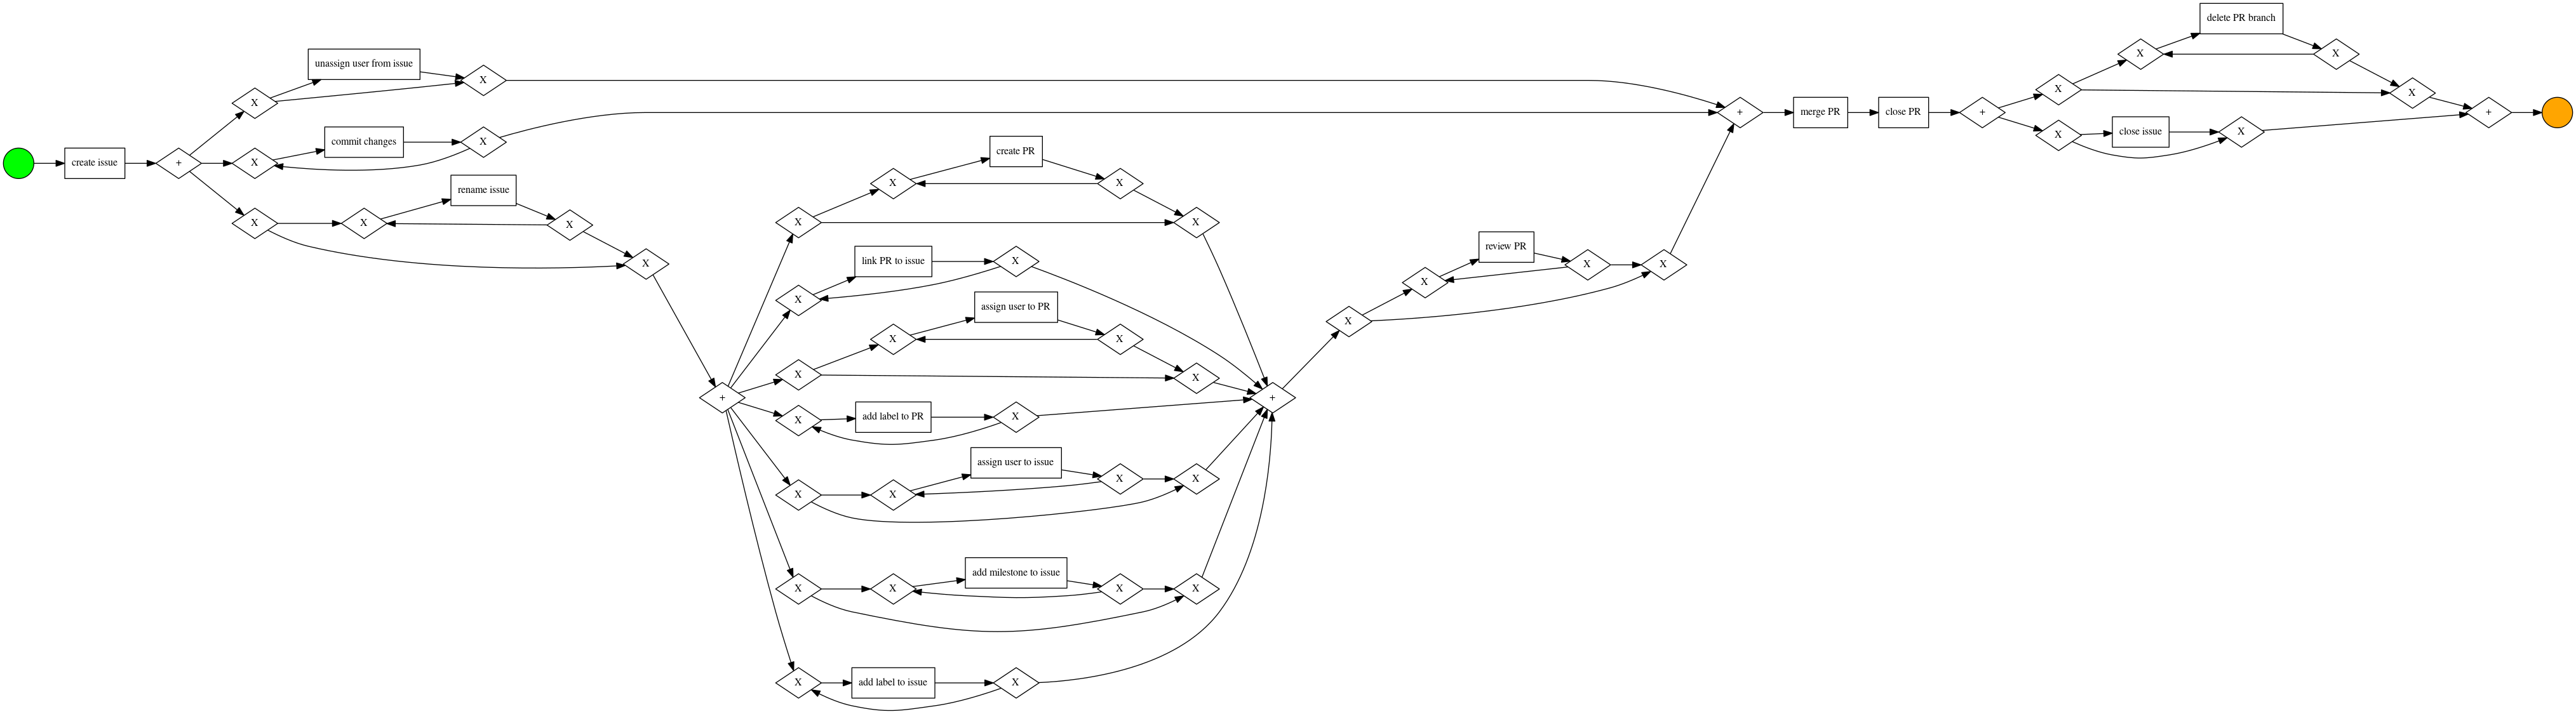

In [2]:
noise_threshold = 0.2 # 20%
bpmn_model = pm4py.discover_bpmn_inductive(df, noise_threshold)
pm4py.view_bpmn(bpmn_model)

### Obtaining a Process Map

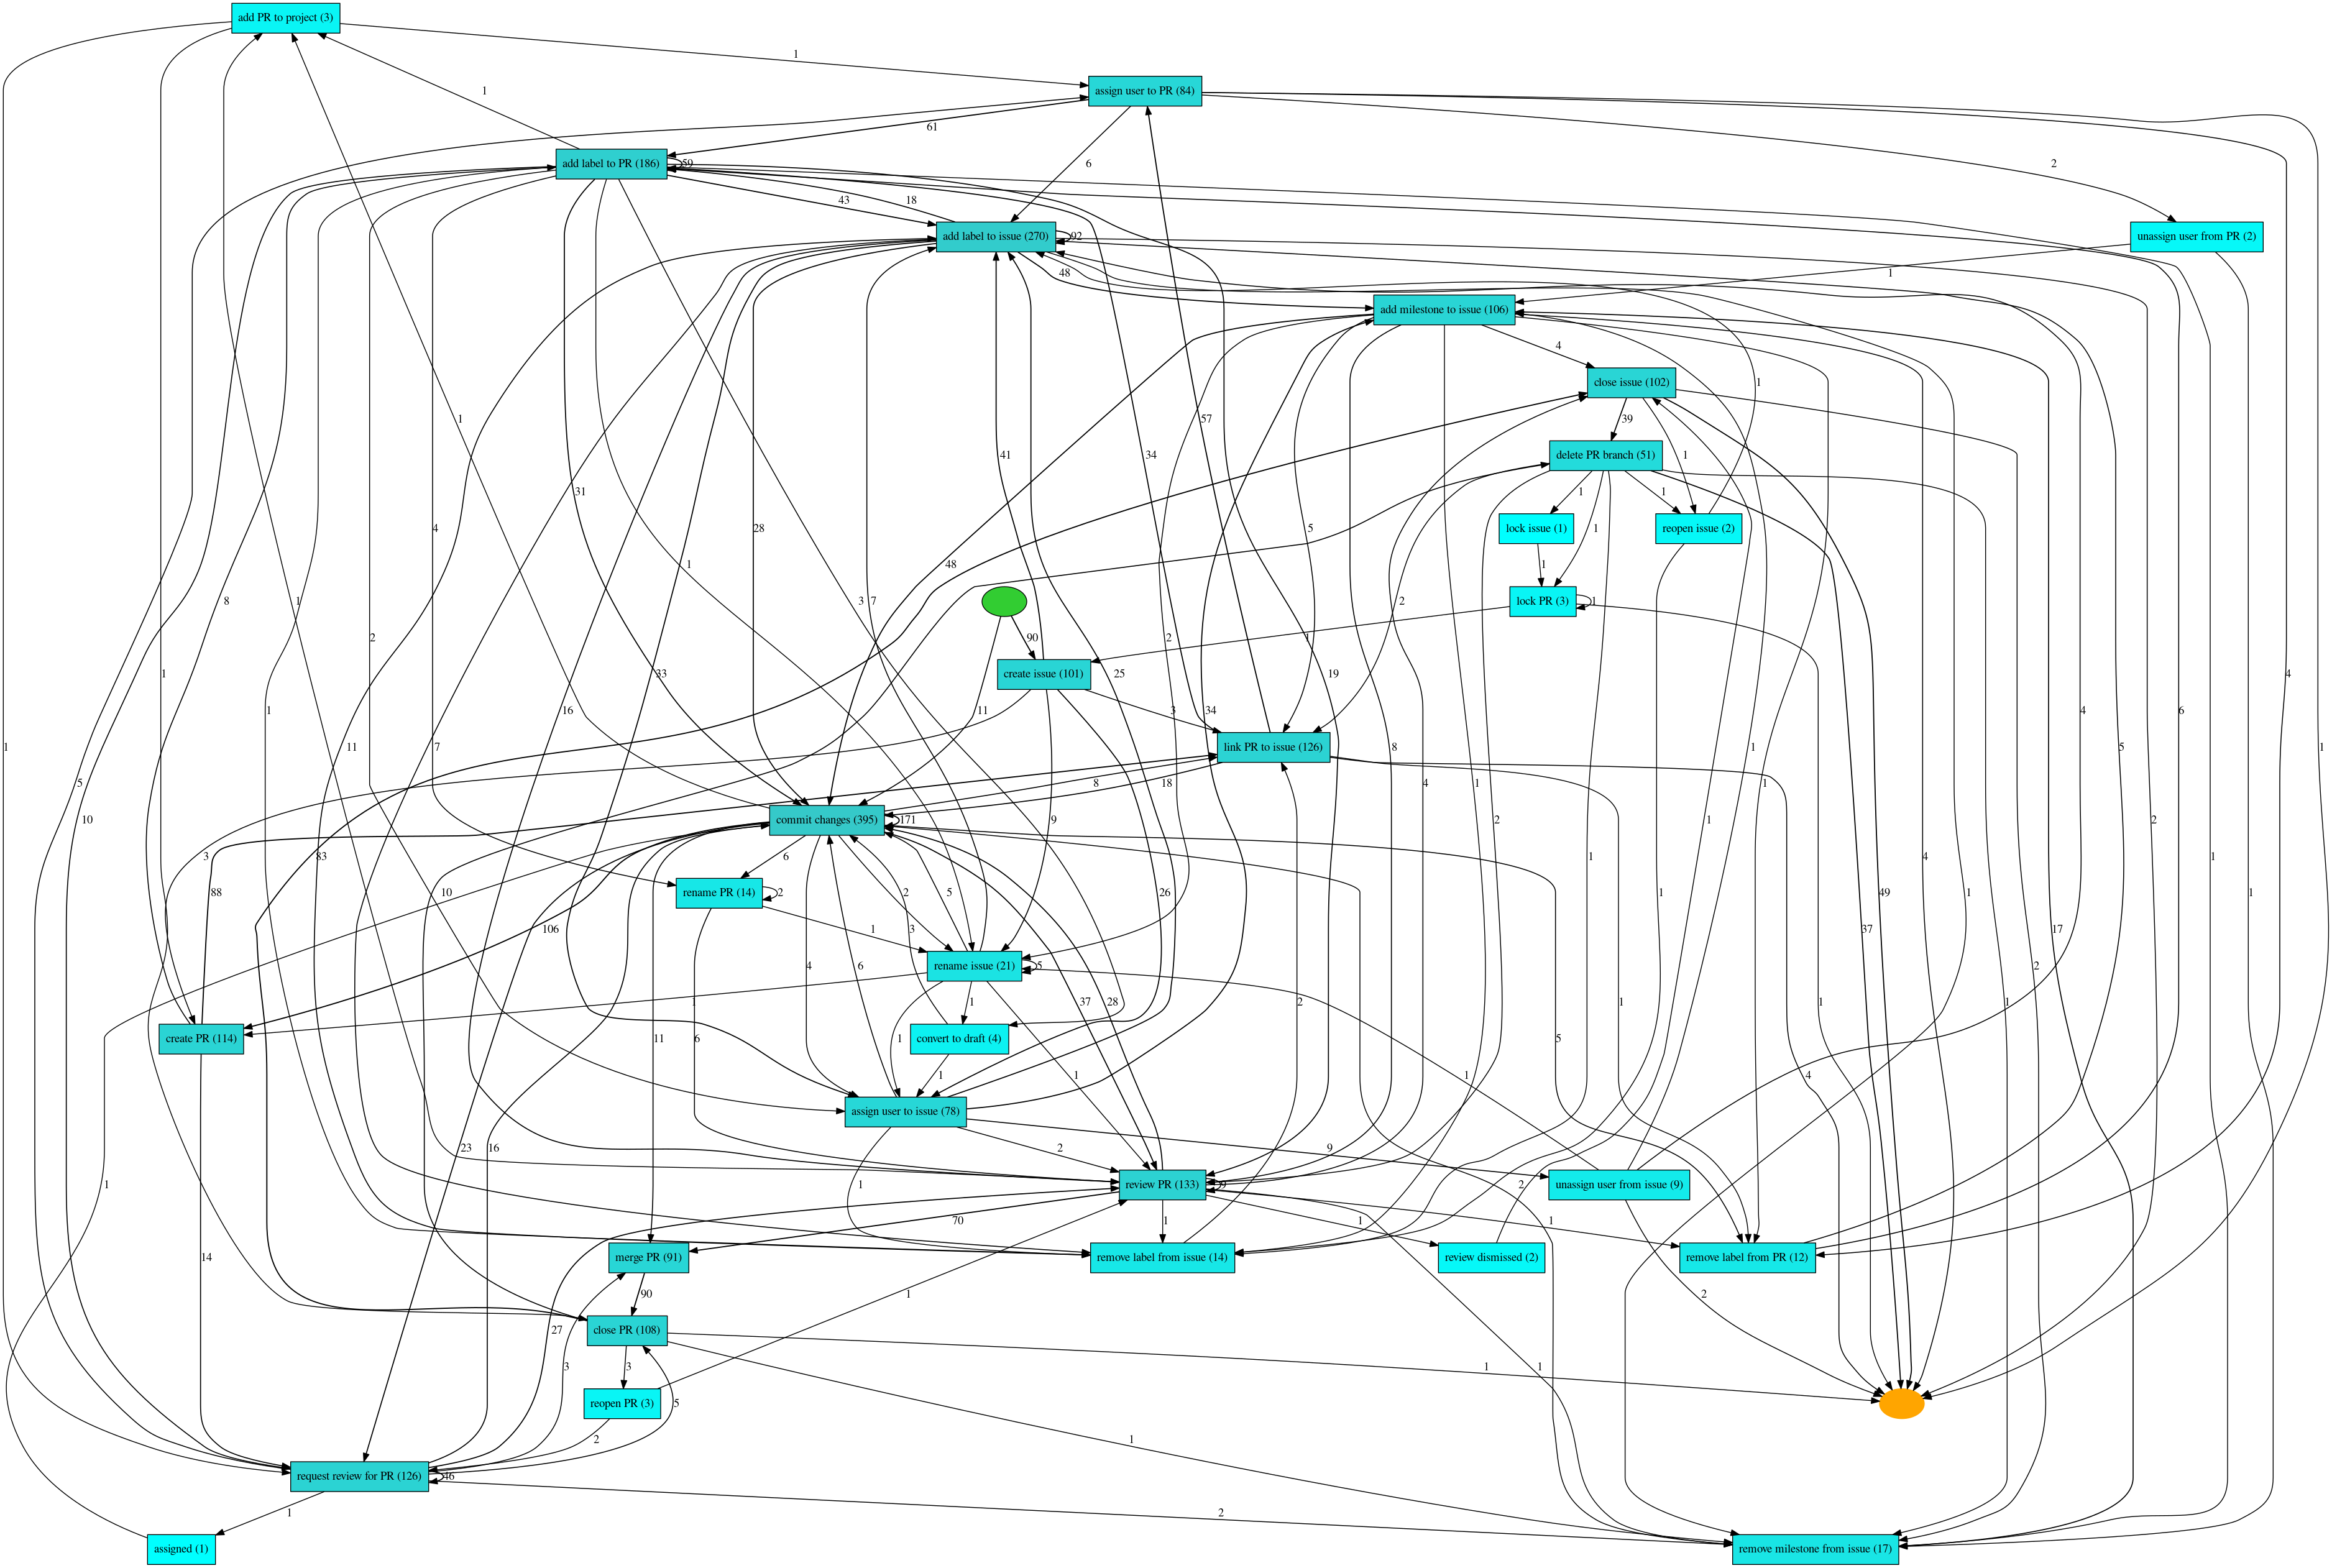

In [3]:
map = pm4py.discover_heuristics_net(df)
pm4py.view_heuristics_net(map)